<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/PersonalProjectIndonesianStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Getting Data

In [ ]:
tick = "BBCA"
full_tick = tick+".JK"

# Connect with yfinance

In [ ]:
import yfinance as yf
data = yf.Ticker(full_tick)
df = data.history(period = "10y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-20 00:00:00+07:00,1721.509100,1721.509100,1678.471372,1691.382690,39292500,0.0,0.0
2014-01-21 00:00:00+07:00,1682.774962,1708.597596,1682.774962,1695.686279,28476000,0.0,0.0
2014-01-22 00:00:00+07:00,1691.382506,1704.293823,1674.167417,1704.293823,100006500,0.0,0.0
2014-01-23 00:00:00+07:00,1721.509028,1764.546754,1704.293938,1755.939209,160911500,0.0,0.0
2014-01-24 00:00:00+07:00,1751.635376,1764.546693,1717.205197,1751.635376,90143000,0.0,0.0


In [ ]:
df.reset_index(inplace=True)
df.drop(columns=["Date","Dividends","Stock Splits"],inplace = True)
df.head(10)

,Open,High,Low,Close,Volume
0,1721.509100,1721.509100,1678.471372,1691.382690,39292500
1,1682.774962,1708.597596,1682.774962,1695.686279,28476000
2,1691.382506,1704.293823,1674.167417,1704.293823,100006500
3,1721.509028,1764.546754,1704.293938,1755.939209,160911500
4,1751.635376,1764.546693,1717.205197,1751.635376,90143000
5,1712.901245,1712.901245,1661.255981,1687.078613,106837500
6,1687.078853,1730.116578,1678.471307,1721.509033,77513500
7,1730.116578,1781.761849,1721.509033,1721.509033,144919000
8,1695.686218,1712.901306,1691.382446,1708.597534,81985500
9,1704.294009,1721.509100,1691.382690,1691.382690,55407000


In [ ]:
next = []
for i in range(len(df)):
  if i < len(df) - 1:
    next.append(df["Close"][i+1])
  else:
    next.append(0)

df["Next"] = next
df.head()

,Open,High,Low,Close,Volume,Next
0,1721.509100,1721.509100,1678.471372,1691.382690,39292500,1695.686279
1,1682.774962,1708.597596,1682.774962,1695.686279,28476000,1704.293823
2,1691.382506,1704.293823,1674.167417,1704.293823,100006500,1755.939209
3,1721.509028,1764.546754,1704.293938,1755.939209,160911500,1751.635376
4,1751.635376,1764.546693,1717.205197,1751.635376,90143000,1687.078613


In [ ]:
df.drop(df.index[-1], inplace = True)

In [ ]:
nan_count_total = df.isna().sum()
nan_count_specific_columns = df[['Open', 'High', 'Low', 'Volume', 'Close']].isna().sum()

In [ ]:
print("NaN count in the entire DataFrame:")
print(nan_count_total)

print("\nNaN count in specific columns:")
print(nan_count_specific_columns)


NaN count in the entire DataFrame:
Open      0
High      0
Low       0
Close     0
Volume    0
Next      0
dtype: int64

NaN count in specific columns:
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64


# Correlation

<Axes: >

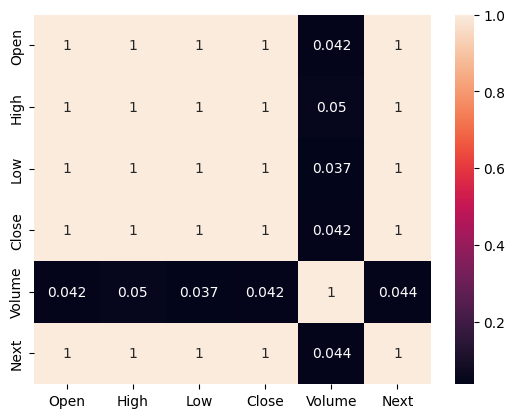

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,5].values

# Must be above 0.7 to have a good correlation (baseline)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train

array([[4371.54683287, 4403.32339344, 4339.7702723 , 4367.00732422],
       [7634.32693984, 7682.19105858, 7562.53076172, 7562.53076172],
       [1992.23105038, 2097.31576512, 1979.09546104, 2084.18017578],
       ...,
       [2766.33232698, 2779.69625126, 2761.87768555, 2761.87768555],
       [3177.69591283, 3227.06689453, 3177.69591283, 3227.06689453],
       [5928.47622496, 5984.7592271 , 5914.40547443, 5970.68847656]])

In [ ]:
X_test

array([[2322.80571605, 2340.53705739, 2318.37288071, 2331.67138672],
       [6921.85584497, 6983.87109375, 6912.31503746, 6983.87109375],
       [5224.93880585, 5309.36331079, 5178.0363031 , 5271.84130859],
       ...,
       [4357.92801047, 4371.5465355 , 4303.45391034, 4335.23046875],
       [4830.95759249, 4971.66509519, 4690.2500898 , 4896.62109375],
       [2752.96821045, 2775.24141603, 2735.14964598, 2757.42285156]])

In [ ]:
y_train

array([4389.70507812, 7371.07421875, 2149.8581543 , ..., 2761.87768555,
       3240.53198242, 5947.23730469])

In [ ]:
y_test

array([2327.23876953, 7179.45800781, 5351.57568359, 4389.70507812,
       5743.56542969, 8537.79492188, 5014.36132812, 6322.79101562,
       2374.47167969, 6416.88037109, 6388.65332031, 1807.58447266,
       2235.76196289, 2088.65917969, 7466.80273438, 2248.99169922,
       4162.72900391, 4376.08544922, 4721.19970703, 5859.90234375,
       7610.39501953, 2614.87475586, 9255.83789062, 2296.65869141,
       2272.45703125, 6186.36181641, 8367.0390625 , 2819.28344727,
       2453.24829102, 9325.        , 6327.49560547, 4868.73681641,
       2677.43310547, 2295.32226562, 4090.71533203, 4040.16235352,
       9056.78808594, 3991.6003418 , 5202.67431641, 2088.55834961,
       4348.84863281, 5163.96582031, 4126.41308594, 2266.32543945,
       4158.18945312, 2027.9921875 , 2677.43310547, 8807.97460938,
       4270.921875  , 3213.60253906, 7610.39501953, 5777.17382812,
       6008.2109375 , 3397.62133789, 7532.63867188, 4009.62084961,
       6619.171875  , 9206.07519531, 5895.64453125, 8489.00781

# Making a model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result = pd.DataFrame({
    "Real": y_test,
    "Pred": np.concatenate((y_pred.reshape(len(y_pred), 1)))
})

result.head()


,Real,Pred
0,2327.238770,2336.391269
1,7179.458008,6982.014241
2,5351.575684,5265.460721
3,4389.705078,4360.133748
4,5743.565430,5744.007376


In [ ]:
  from sklearn.metrics import mean_squared_error, r2_score

  print("Results: /n----------")
  print(f"Intercept: {regressor.intercept_}")
  print(f"Coef: {regressor.coef_}")
  print(f"Mean Error: {mean_squared_error(y_test, y_pred, squared=False)}")
  print(f"\nR^2 Score: {r2_score(y_test,y_pred)}")

Results: /n----------
Intercept: 3.7357694065931355
Coef: [-0.14  0.16  0.3   0.69]
Mean Error: 83.92332920543528

R^2 Score: 0.998740764319343


In [ ]:
train_yhat = regressor.predict(X_train)
train_acc = r2_score(y_train, train_yhat)
test_yhat = regressor.predict(X_test)
test_acc = r2_score(y_test,test_yhat)
print(f"Train : {train_acc} Test: {test_acc}")

Train : 0.9990150203132713 Test: 0.998740764319343


In [ ]:
df = data.history(period = "10y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-20 00:00:00+07:00,1721.509100,1721.509100,1678.471372,1691.382690,39292500,0.0,0.0
2014-01-21 00:00:00+07:00,1682.774962,1708.597596,1682.774962,1695.686279,28476000,0.0,0.0
2014-01-22 00:00:00+07:00,1691.382506,1704.293823,1674.167417,1704.293823,100006500,0.0,0.0
2014-01-23 00:00:00+07:00,1721.509028,1764.546754,1704.293938,1755.939209,160911500,0.0,0.0
2014-01-24 00:00:00+07:00,1751.635376,1764.546693,1717.205197,1751.635376,90143000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-15 00:00:00+07:00,9750.000000,9750.000000,9650.000000,9725.000000,88399500,0.0,0.0
2024-01-16 00:00:00+07:00,9700.000000,9750.000000,9675.000000,9700.000000,44869200,0.0,0.0
2024-01-17 00:00:00+07:00,9750.000000,9750.000000,9650.000000,9750.000000,107706100,0.0,0.0


In [ ]:

# Input the date for which you want to make a prediction
input_date = "2023-09-14"  # Replace with the desired date in yyyy-mm-dd format

# Locate the row in the DataFrame based on the input date
input_row = df.loc[input_date]

# Extract the values of 'Open', 'High', 'Low', and 'Close' for the input date
input_open = input_row['Open']
input_high = input_row['High']
input_low = input_row['Low']
input_close = input_row['Close']

# Perform the prediction
predict = regressor.predict([[input_open, input_high, input_low, input_close]])

# Set numpy's print options
np.set_printoptions(precision=2)

# Extract the predicted value
predicted_price = predict[0]

# Compare with the input day's open price
if predicted_price > input_open:
    print(f"{predicted_price} (the predicted price the day after the {input_date}) > {input_open} (the price in {input_date}), price will go up the next day")
elif predicted_price < input_open:
    print(f"{predicted_price} (the predicted price the day after the {input_date}) < {input_open} (the price in {input_date}), price will go down the next day")


9057.905031357044 (the predicted price the day after the 2023-09-14) > 8957.262942135989 (the price in 2023-09-14), price will go up the next day


In [ ]:
df = data.history(period = "7d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-11 00:00:00+07:00,9625.0,9650.0,9575.0,9575.0,39381500,0.0,0.0
2024-01-12 00:00:00+07:00,9650.0,9700.0,9600.0,9700.0,68253400,0.0,0.0
2024-01-15 00:00:00+07:00,9750.0,9750.0,9650.0,9725.0,88399500,0.0,0.0
2024-01-16 00:00:00+07:00,9700.0,9750.0,9675.0,9700.0,44869200,0.0,0.0
2024-01-17 00:00:00+07:00,9750.0,9750.0,9650.0,9750.0,107706100,0.0,0.0
2024-01-18 00:00:00+07:00,9675.0,9750.0,9625.0,9675.0,71048900,0.0,0.0
2024-01-19 00:00:00+07:00,9775.0,9775.0,9600.0,9625.0,63176500,0.0,0.0


In [ ]:
# Get the most recent row from your DataFrame 'df'
previous_day_data = df.iloc[-1]

# Extract the values of 'Open', 'High', 'Low', and 'Close' from the previous day
previous_open = previous_day_data['Open']
previous_high = previous_day_data['High']
previous_low = previous_day_data['Low']
previous_close = previous_day_data['Close']

# Use the extracted values for prediction
predict = regressor.predict([[previous_open, previous_high, previous_low, previous_close]])

# Rest of your code
np.set_printoptions(precision=2)
result = np.concatenate((predict.reshape(len(predict), 1)))
print(result[0])
print("")

if result[0] > df["Open"][len(df)-1]:
    print(f"{result[0]} (the price the next day) > {df['Open'][len(df)-1]} (the price the previous day), price will go up the next day")
elif result[0] < df["Open"][len(df)-1]:
    print(f"{result[0]} (the price the next day) < {df['Open'][len(df)-1]} (the price the previous day), price will go down the next day")


9632.936635675258

9632.936635675258 (the price the next day) < 9775.0 (the price the previous day), price will go down the next day
